# Case Study: Predicting customer churn for an online store
The goal of this project is to predict whether a customer is likely to churn or not based on historical data and relevant features using machine learning.


# Data Preparation

In [1]:
# Import necessary libraries

## Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

## Data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

#Feature engineering
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


## Model
from sklearn.linear_model import LogisticRegression

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Time
import time

#Saving and loading model
import pickle

In [2]:
#Import data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Check data size
df.shape

(7043, 21)

## Exploratory Data Analysis

In [3]:
#View data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Let's see how many customers churn (yes) and did not churn (no) samples
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

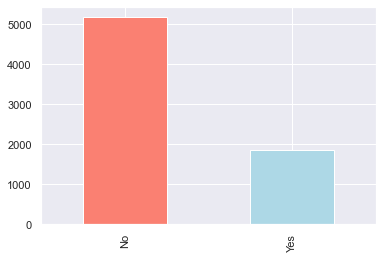

In [7]:
# Visualize target value counts with a bar graph
df.Churn.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
#Describe numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


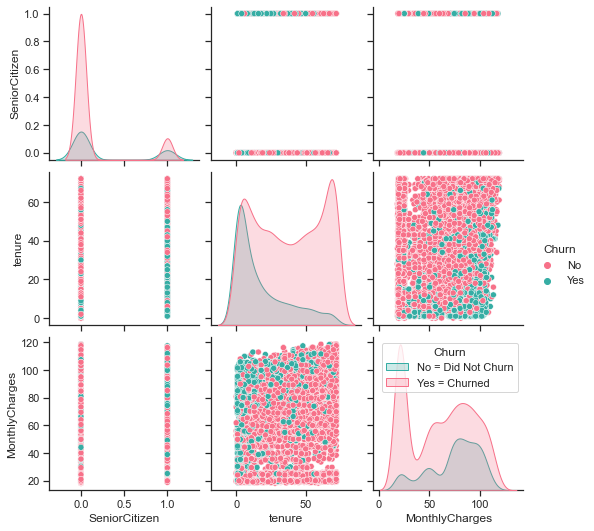

In [9]:
#Multiple comparison between numerical features and target
sns.set_style("ticks")
sns.pairplot(df,hue = 'Churn',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.legend(title='Churn', loc='upper right', labels=['No = Did Not Churn', 'Yes = Churned']);
plt.show()

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
##

# Data Preprocessing

In [12]:
# Check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#Check for data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# Make a copy of the original DataFrame to perform edits on
df_new = df.copy()

In [15]:
#View target variable
df_new.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [16]:
#Converting the column'churn' to numerical datatype
# Apply the mapping to the "Churn" column
df_new["Churn"] = df_new["Churn"].map({'Yes': 1, 'No': 0})
df_new["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

#### Lets Convert Columns with strings to integers

In [17]:
#Checking columns with strings
for label, content in df_new.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges


In [18]:
# Convert all  string values into category values
for label, content in df_new.items():
    if pd.api.types.is_string_dtype(content):
        df_new[label] = content.astype("category").cat.as_ordered()

In [19]:
#Check datatypes
df_new.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn                  int64
dtype: object

In [20]:
# Convert categorical variables into numbers
for label, content in df_new.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        df_new[label] = pd.Categorical(content).codes

In [21]:
#Check datatype again
df_new.dtypes

customerID            int16
gender                 int8
SeniorCitizen         int64
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges          int16
Churn                 int64
dtype: object

In [22]:
#View data
df_new.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1550,0
7,4770,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,2609,0
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,2646,1
9,4534,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3022,0


# Feature Selection

In [23]:
# Split data into X & y 

# All feature variables
X = df_new.drop("Churn", axis=1)

# Target variable
y = df_new["Churn"]

<function matplotlib.pyplot.show(close=None, block=None)>

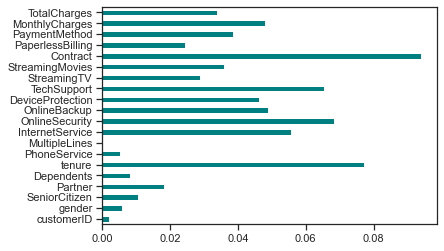

In [24]:
#Analysing important features using Information Gain
importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, df_new.columns[0:len(df_new.columns)-1])

feat_importances.plot(kind='barh', color = 'teal')
plt.show

> MultipleLines and gender have little relevance for predicting churn




In [25]:
#Feature selection using correlation
corr = df_new.corr()
corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


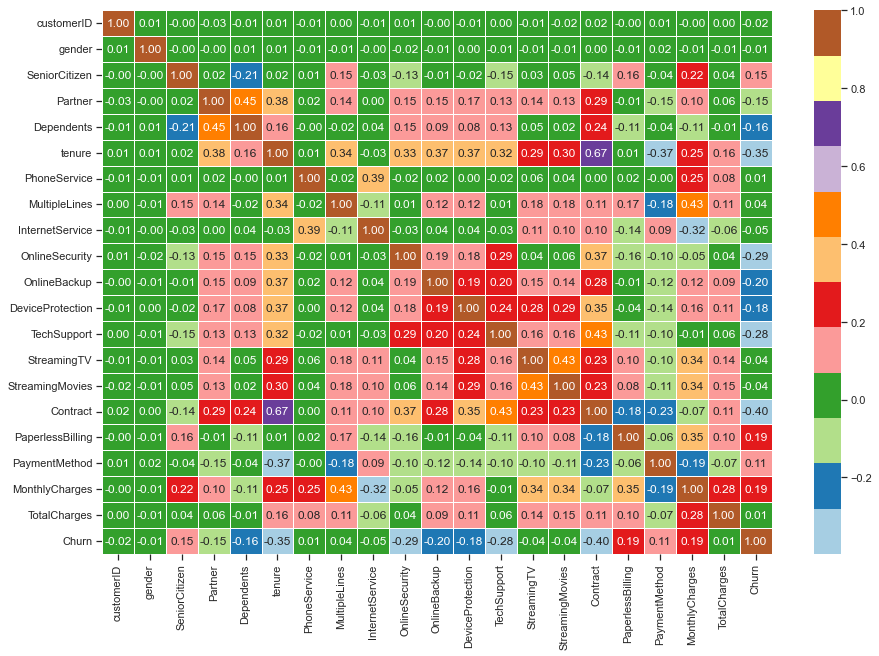

In [26]:
#Visualize correlation
corr_matrix = df_new.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="Paired");


#### Feature importance based on feature permutation

*Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set*. (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

In [27]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set
#Model for engineering
forest = RandomForestClassifier(random_state=0)

#Fit training data to model
forest.fit(X_train, y_train)

#Select features name
feature_names = X_train.columns

#Set start time
start_time = time.time()

#Feature importance using permutation importance
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
#Set elapsed time
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 7.527 seconds


In [28]:
#View result
forest_importances

customerID          0.001348
gender              0.001845
SeniorCitizen       0.003194
Partner            -0.000994
Dependents         -0.001632
tenure              0.046061
PhoneService       -0.001419
MultipleLines       0.000284
InternetService     0.008872
OnlineSecurity      0.009439
OnlineBackup       -0.002200
DeviceProtection    0.002626
TechSupport         0.006955
StreamingTV        -0.000923
StreamingMovies    -0.004684
Contract            0.030944
PaperlessBilling    0.000568
PaymentMethod      -0.001916
MonthlyCharges      0.013272
TotalCharges        0.002200
dtype: float64

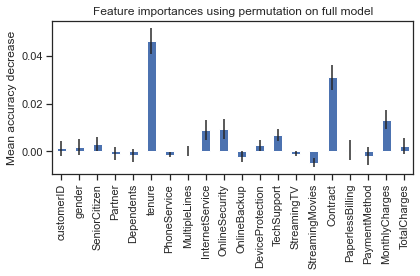

In [29]:
#Visualizing result
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Remark: Features like PhoneService, MultipleLines, OnlineBackup, StreamingTV, StreamingMovies  have low importance, suggesting that they don't have a strong impact on the model's predictions. Hence, will be dropped.

Partner, Dependents and PaymentMethod negatively affects the outcome. Hence, will be dropped.

CustomerID will also be dropped as it is an identifier assigned to each customer and doesn't inherently carry any predictive information.

Gender will be dropped as it as very small positive impact on the outcome.

##### Drop features with the least importance

In [30]:
#View features
X.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [31]:
# List of columns to drop
columns_to_drop = ['customerID', 'gender','PhoneService', 'MultipleLines', 'OnlineBackup', 'StreamingTV', 
                   'StreamingMovies', 'Partner', 'Dependents', 'PaymentMethod']

# Drop the specified columns
X_new = X.drop(columns=columns_to_drop)

X_new.columns

Index(['SeniorCitizen', 'tenure', 'InternetService', 'OnlineSecurity',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [32]:
# Reassign X_new to x
x = X_new
x.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,1,29.85,2505
1,0,34,0,2,2,0,1,0,56.95,1466
2,0,2,0,2,0,0,0,1,53.85,157
3,0,45,0,2,2,2,1,0,42.30,1400
4,0,2,1,0,0,0,0,1,70.70,925


In [33]:
#View y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Data Splitting

In [34]:
# Random seed for reproducibility
np.random.seed(42)

# Split data into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 10), (1409, 10), (5634,), (1409,))

# Model selection

In [36]:
#Select model
model = LogisticRegression()

In [37]:
#Check model parameters
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
# Increase the Maximum Iterations:
model = LogisticRegression(max_iter=6000)

# Model Training

In [39]:
# Fit the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=6000)

# Prediction and Evaluation

In [40]:
# Evaluate the model on the training set
model.score(x_train, y_train)

0.7955271565495208

In [41]:
# Evaluate the model on the test set
model.score(x_test, y_test)

0.815471965933286

In [42]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = model.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [44]:
#Evaluate the model with confusion matrix
print(confusion_matrix(y_test, y_preds))

[[930 106]
 [154 219]]


In [45]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,930,106
1,154,219


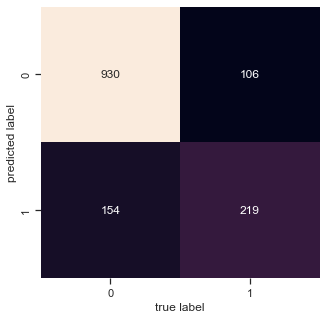

In [46]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, fmt="d",
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [47]:
#Evaluate with ROC/AUC Curve
y_probs = model.predict_proba(x_test)

y_probs[:10]

array([[0.53575508, 0.46424492],
       [0.86256183, 0.13743817],
       [0.9910516 , 0.0089484 ],
       [0.41002987, 0.58997013],
       [0.98760581, 0.01239419],
       [0.63019199, 0.36980801],
       [0.9572874 , 0.0427126 ],
       [0.99238345, 0.00761655],
       [0.97760021, 0.02239979],
       [0.78135205, 0.21864795]])

In [48]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.46424492, 0.13743817, 0.0089484 , 0.58997013, 0.01239419,
       0.36980801, 0.0427126 , 0.00761655, 0.02239979, 0.21864795])

In [49]:
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

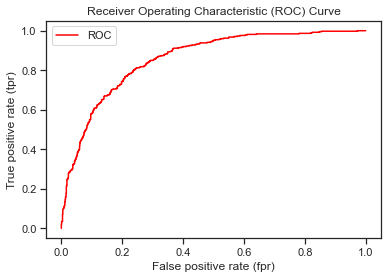

In [50]:
#Visualise Roc curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false postive rate(fpr) 
    and true positive rate (tpr) of model.
    """
    
    plt.plot(fpr, tpr, color="red", label="ROC")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

# Tuning and Optimization

In [51]:
#Check model parameters
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 6000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Tuning models with GridSearchCV

In [52]:
#Tuning models with with GridSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "max_iter": (60, 100, 6000),
                "solver": ["liblinear"]}

# Setup random seed
np.random.seed(42)

#  Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [53]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'max_iter': 60, 'solver': 'liblinear'}

In [54]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
gsmodel = LogisticRegression(solver="liblinear", C=0.03359818286283781, max_iter=60)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
gsmodel.fit(x_train, y_train)

LogisticRegression(C=0.03359818286283781, max_iter=60, solver='liblinear')

In [55]:
# Evaluate the model on the test set
gsmodel.score(x_test, y_test)

0.8147622427253371

In [56]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = gsmodel.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
#Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



The difference between the precision, recall, and F1-score for Class 0 and Class 1 in the classification report shows that the model struggles to accurately identify churned customers. 

In [58]:
#View value count for tagert variable in training data
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

*Using SMOTEEN to correct class imbalance (https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)*

In [59]:
# Instantiate the SMOTEENN sampler
sampler = SMOTEENN(random_state=42)

# Resample data
x_resampled, y_resampled = sampler.fit_resample(x, y)

In [60]:
#splitting resampled data
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled,test_size=0.2)

In [61]:
#fitting resampled data to model
gsmodel.fit(X_train, Y_train)

LogisticRegression(C=0.03359818286283781, max_iter=60, solver='liblinear')

In [62]:
# Evaluate the model on the training set
gsmodel.score(X_train, Y_train)

0.9133261105092091

In [63]:
# Evaluate the model on the test set
gsmodel.score(X_test, Y_test)

0.9003466204506065

In [64]:
# Use the model to make a prediction on the test data
new_preds = gsmodel.predict(X_test)
new_preds

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [65]:
#Print classification report
print(classification_report(Y_test, new_preds))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       565
           1       0.89      0.91      0.90       589

    accuracy                           0.90      1154
   macro avg       0.90      0.90      0.90      1154
weighted avg       0.90      0.90      0.90      1154



In [66]:
#Evaluate the model with confusion matrix
print(confusion_matrix(Y_test, new_preds))

[[501  64]
 [ 51 538]]


In [67]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test,
           new_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,501,64
1,51,538


In [68]:
#Evaluate with ROC/AUC Curve
new_probs = gsmodel.predict_proba(X_test)

new_probs[:10]

array([[0.92779094, 0.07220906],
       [0.67072724, 0.32927276],
       [0.04398942, 0.95601058],
       [0.98799682, 0.01200318],
       [0.0114991 , 0.9885009 ],
       [0.98890349, 0.01109651],
       [0.1779264 , 0.8220736 ],
       [0.97862102, 0.02137898],
       [0.98767506, 0.01232494],
       [0.01969537, 0.98030463]])

In [69]:
new_probs_positive = new_probs[:,1]
new_probs_positive[:10]

array([0.07220906, 0.32927276, 0.95601058, 0.01200318, 0.9885009 ,
       0.01109651, 0.8220736 , 0.02137898, 0.01232494, 0.98030463])

In [70]:
fpr, tpr, thresholds = roc_curve(Y_test,new_probs_positive)

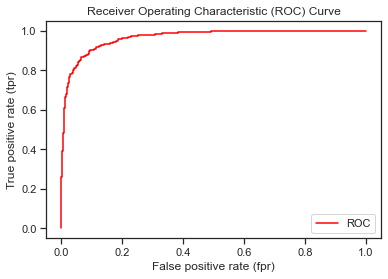

In [71]:
#Visualise Roc curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false postive rate(fpr) 
    and true positive rate (tpr) of model.
    """
    
    plt.plot(fpr, tpr, color="red", label="ROC")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

### Save Model

In [72]:
#Saving Model
pickle.dump(gsmodel, open("customer_churn_ml_project_model.pkl", "wb"))

# Deployment